In [5]:
import numpy as np
import pandas as pd

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train = pd.read_json('/content/train.json')
df_train.head()


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


**Data Preprocessing**

In [7]:
df_train.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

**Count of cuisines in dataset**

<Axes: >

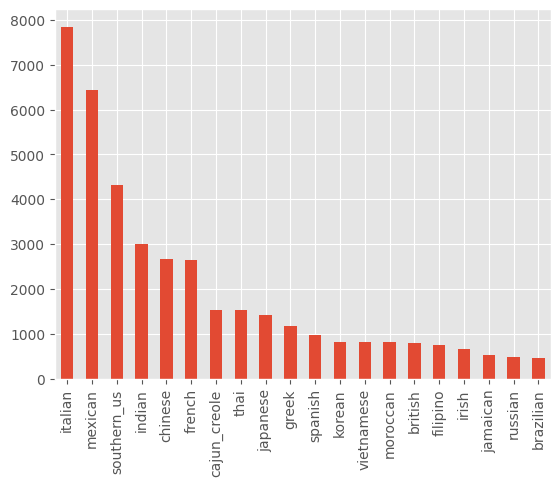

In [8]:
#cuisine count in the dataset
plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')


**Most frequent ingredients for each cuisine**

In [9]:
#counter is a dictionary which counts the frequency of each ingredient for every unique cuisine
from collections import Counter
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [10]:
#count of common ingredients in italian
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [11]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


**Add new column every_ingredients**

In [12]:
#adding a new column as every_ingredients which maps every ingredients as a string separated by a semi colon
df_train['every_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()


,id,cuisine,ingredients,every_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


**Check for the presence of an ingredient in recipe**

In [13]:
#it checks in every_ingredients columns whether pepper is present or not...
df_train['every_ingredients'].str.contains('pepper')

0         True
1         True
2         True
3        False
4         True
         ...  
39769    False
39770     True
39771    False
39772    False
39773     True
Name: every_ingredients, Length: 39774, dtype: bool

<Axes: title={'center': 'pepper as found per cuisine'}>

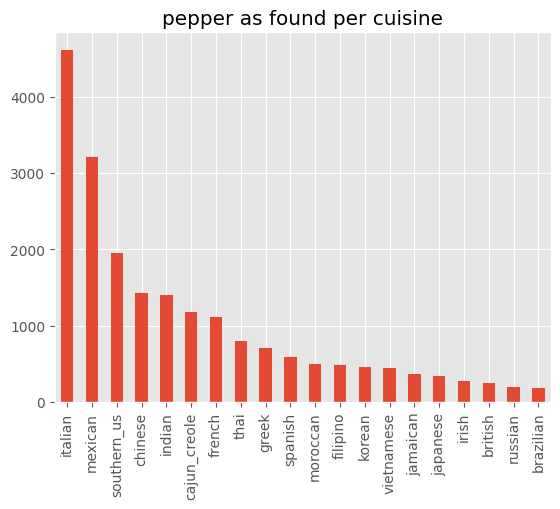

In [14]:
#shows how many dishes in each cuisine contains pepper in every_ingredients column
indices = df_train['every_ingredients'].str.contains('pepper')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='pepper as found per cuisine')


**Unique Ingredients**

In [15]:
#np.unique() is used to return unique ingredients from top10 array and store each in object called unique and then flatten into 1D array
import numpy as np
unique = np.unique(top10.values.ravel())
unique


array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

In [16]:
len(unique)

63

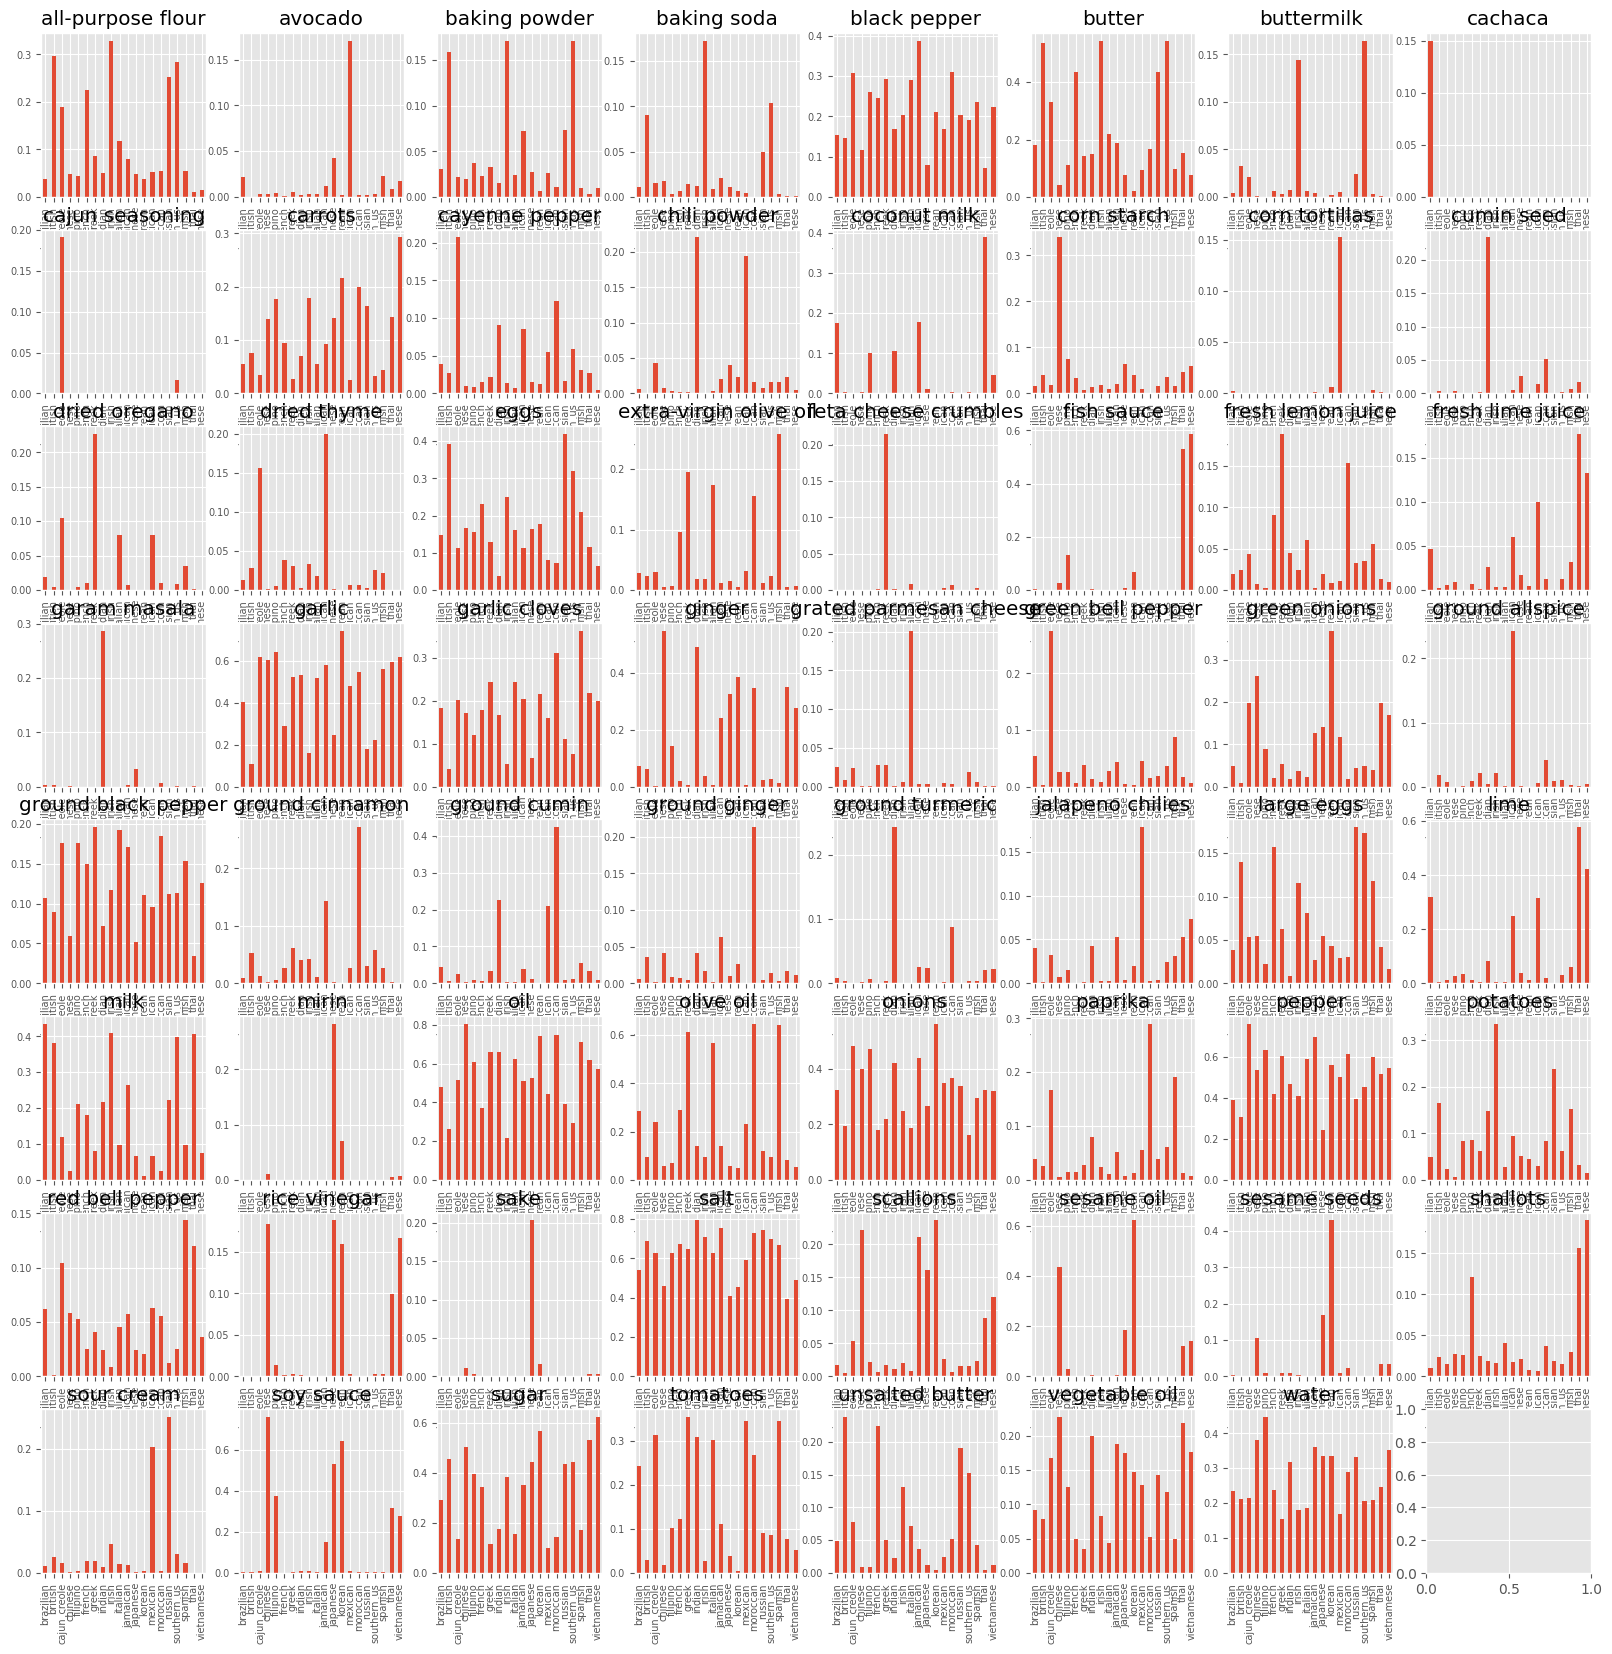

In [17]:
#creates a plot for each unique ingredient in 1D array of range 64
#finds whether every unique ingedient is present in every_ingredients coloum(boolean function)
#finds the frequency of each unique ingredient using counts() function
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['every_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
#Dataframe(every_ingredients column)(text data) is transformed into matrix X
#values of matrix represents count of each ingredient in each cuisine
cv = CountVectorizer()
X = cv.fit_transform(df_train['every_ingredients'].values)
X.shape


(39774, 3010)

In [20]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

**Unique Cuisines**

In [21]:
df_train.describe(include='all')

,id,cuisine,ingredients,every_ingredients
count,39774.000000,39774,39774,39774
unique,NaN,20,39674,39674
top,NaN,italian,[unsalted butter],unsalted butter
freq,NaN,7838,3,3
mean,24849.536959,NaN,NaN,NaN
std,14360.035505,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,12398.250000,NaN,NaN,NaN
50%,24887.000000,NaN,NaN,NaN
75%,37328.500000,NaN,NaN,NaN


**Data Wrangling**

In [22]:
#converting categorical data into numerical data
#asigning unique values for each unique cuisine
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)
y[:100]


array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [23]:
#returning array consisting of unique cuisines
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.linear_model import LogisticRegression

**Logistic Regression**

In [26]:
#importing the tarin_test_split function
#splitting the training dataset into X_train and y_train
#testing dataset into X_test and y_test
#assigning LogisticRegression() function to object logistic
#training the logistic model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
m = logistic.predict(X_test)
lgac = accuracy_score(m,y_test)
lgac

0.7790069138906348

In [29]:
import joblib
joblib.dump(logistic, "logistic_regression_model.joblib")

# Load the model from the file
logistic_loaded = joblib.load("logistic_regression_model.joblib")


**Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
#training DecisionTree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
ac = tree.predict(X_test)
actree = accuracy_score(ac,y_test)
actree

0.6428661219358893

**KNN**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#training KNN model
neighbor=KNeighborsClassifier()
neighbor.fit(X_train,y_train)


KNeighborsClassifier()

In [36]:
from sklearn.metrics import accuracy_score


In [37]:
o =neighbor.predict(X_test)
f = accuracy_score(o,y_test)
f


0.6363293526084224

**Comparision Table**

In [38]:
models=pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','K-Nearest Neighbours'],
    'Score':[lgac,actree,f]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Logistic Regression,0.779007
1,Decision Tree,0.642866
2,K-Nearest Neighbours,0.636329


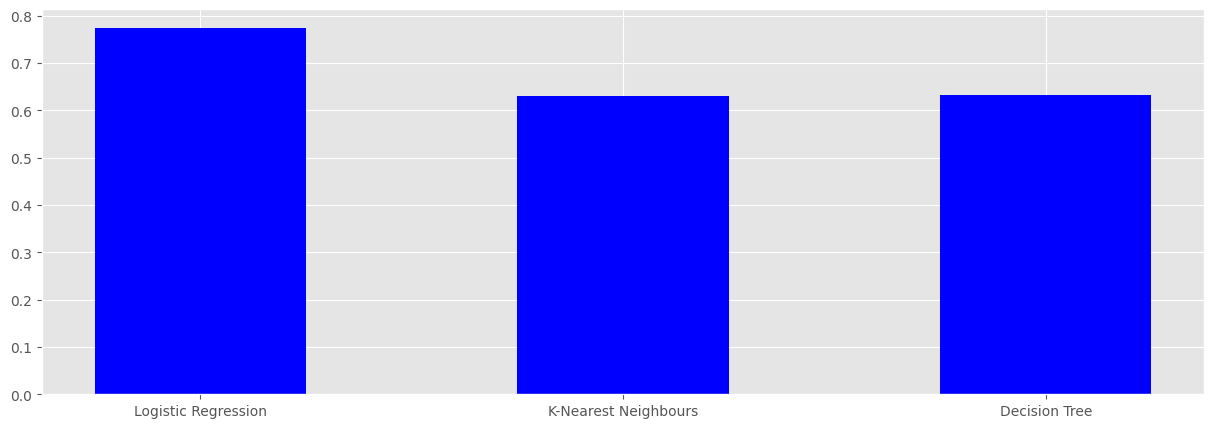

In [39]:
data = {'Logistic Regression':0.774859,'K-Nearest Neighbours':0.630547,'Decision Tree':0.633061}
models = list(data.keys())
score = list(data.values())
plt.figure(figsize=(15,5))

plt.bar(models,score, color ='blue',width=0.5)
plt.show()

**Confusion Matrix**

Text(0.5, 82.47222222222216, 'Predicted label')

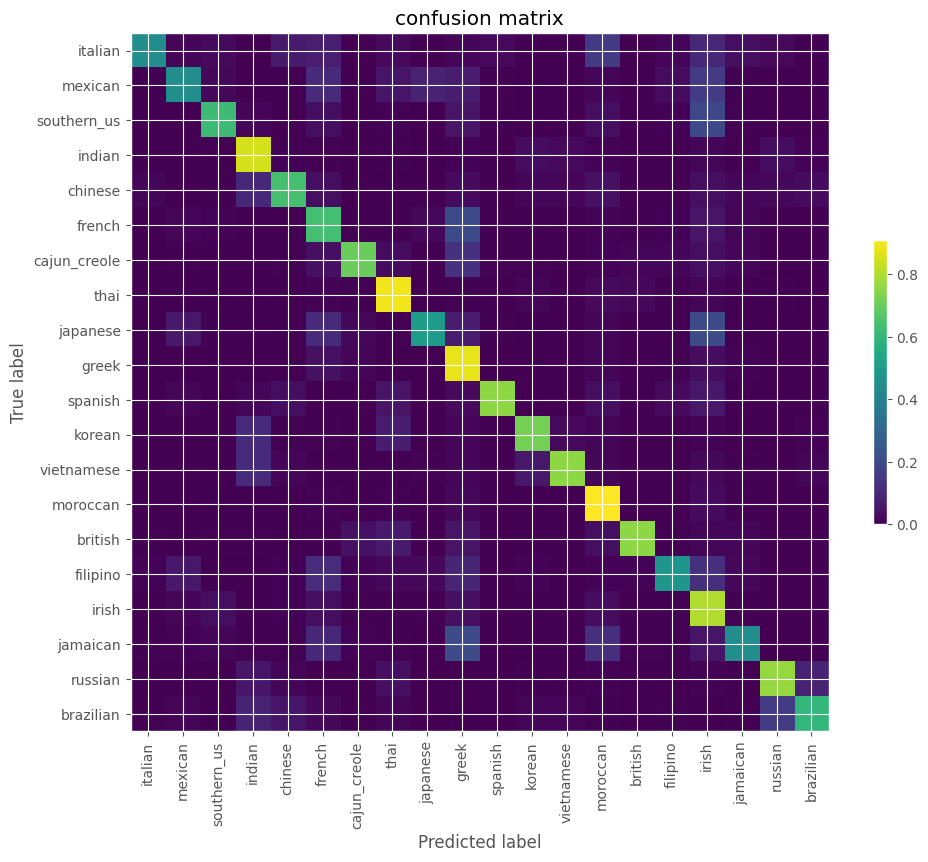

In [40]:
#Inspecting the classification results using a confusion matrix
#Compares actual and predicted values and shows percentage of correct predictions for each cuisine
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


**Classification Report**

In [41]:
from sklearn.metrics import classification_report

In [42]:
#it generates a classification report by compaqring the y_predicted values against the y_test values


y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.74      0.44      0.56        90
     mexican       0.57      0.45      0.50       158
 southern_us       0.77      0.62      0.69       299
      indian       0.79      0.85      0.82       524
     chinese       0.65      0.64      0.65       142
      french       0.61      0.64      0.63       533
cajun_creole       0.80      0.70      0.75       241
        thai       0.85      0.89      0.87       598
    japanese       0.68      0.50      0.58       148
       greek       0.81      0.88      0.84      1586
     spanish       0.80      0.75      0.78        85
      korean       0.80      0.72      0.76       295
  vietnamese       0.82      0.76      0.79       168
    moroccan       0.89      0.91      0.90      1264
     british       0.81      0.76      0.78       172
    filipino       0.56      0.48      0.52        96
       irish       0.70      0.80      0.75       871
    jamaican       0.62    

In [43]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load the training data from JSON
with open("train.json") as f:
    train_data = json.load(f)

# Convert the training data to a pandas DataFrame with cuisine and ingredients
train = pd.DataFrame(train_data)
train = train[["cuisine", "ingredients"]]

# Load the CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Transform the training data
# Transform the training data
train['ingredients_str'] = train['ingredients'].apply(lambda x: ' '.join(x))
train_vectors = vectorizer.fit_transform(train['ingredients_str'])


# Train a logistic regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(train_vectors, train['cuisine'])

# Save the model to a file
joblib.dump(logistic, "logistic_regression_model.joblib")

# Load the model from the file
logistic_loaded = joblib.load("logistic_regression_model.joblib")

# Load the test data from JSON
with open("test.json") as f:
    test_data = json.load(f)

# Convert the test data to a pandas DataFrame with ID and ingredients
test = pd.DataFrame(test_data)
test = test[["id", "ingredients"]]

# Transform the test data using the same CountVectorizer object
test_vectors = vectorizer.transform(test['ingredients'].apply(lambda x: ' '.join(x)))


# Make predictions on the test data using the loaded logistic regression model
test_predictions = logistic_loaded.predict(test_vectors)

# Add the predicted cuisine column to the test DataFrame
test['cuisine'] = test_predictions

# Save the test DataFrame with ID and predicted cuisine to a CSV file
test[['id', 'cuisine']].to_csv('submission.csv', index=False)


**Output**

In [44]:
test[['id', 'cuisine']]

,id,cuisine
0,18009,british
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
...,...,...
9939,30246,french
9940,36028,southern_us
9941,22339,italian
9942,42525,southern_us


In [45]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.1 MB/s eta 0:

In [46]:

import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import gradio as gr

# Load the training data from the JSON file into a pandas DataFrame
with open('train.json') as f:
    train_data = json.load(f)

train_df = pd.DataFrame(train_data)

# Create a CountVectorizer object to transform the ingredient lists into a bag of words representation
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_df['ingredients'].apply(lambda x: ' '.join(x)))
train_y = train_df['cuisine']
# Train a logistic regression model on the training data
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_X, train_y)

# Define the Gradio interface
def predict_cuisine(id, ingredients):
    # Transform the input ingredient list using the CountVectorizer object
    ingredients_list = ingredients.split(',')
    input_X = vectorizer.transform([' '.join(ingredients_list)])

    # Use the trained logistic regression model to make a prediction
    prediction = lr_model.predict(input_X)[0]

    return prediction

# Define the input and output interfaces for Gradio
id_input = gr.inputs.Textbox(label="Enter the recipe id")
ingredients_input = gr.inputs.Textbox(label="Enter a list of ingredients separated by commas")
cuisine_output = gr.outputs.Textbox(label="Predicted Cuisine")

# Launch the Gradio interface
gr.Interface(predict_cuisine, inputs=[id_input, ingredients_input], outputs=cuisine_output, title="Cuisine Predictor").launch()

# id = 22213 ; ingredients = water,vegetable oil,wheat,salt ; cuisine = indian
# id = 12734 ; ingredients = chopped tomatoes,fresh basil,garlic,extra-virgin olive oil,kosher salt,flat leaf parsley ; cuisine = italian
# id = 41995 ; ingredients = ground cinnamon,fresh cilantro,chili powder,ground coriander,kosher salt,ground black pepper,garlic,plum tomatoes,avocado,lime juice,flank steak,saltground cumin,black pepper,olive oil,crushed red pepper flakes,onions ; cuisine = mexican


<ipython-input-46-00ac0ace8a70>:33: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  id_input = gr.inputs.Textbox(label="Enter the recipe id")
<ipython-input-46-00ac0ace8a70>:33: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  id_input = gr.inputs.Textbox(label="Enter the recipe id")
<ipython-input-46-00ac0ace8a70>:33: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  id_input = gr.inputs.Textbox(label="Enter the recipe id")
<ipython-input-46-00ac0ace8a70>:34: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  ingredients_input = gr.inputs.Textbox(label="Enter a list of ingredients separated by commas")
<ipython-input-46-00ac0ace8a70>:34: GradioDeprecationWarning: `optional` parameter is deprecated, an

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>